# BoomBike Sharing Assignment

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Steps which will be followed to develop the model
* Reading and understanding the Data
* Exploratory Data Analysis : EDA
* Data Preparaion
* Normalizing and Scaling
* Feature selection
* Model Building and Evaluation

### Business Goals
The company needs to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Analysis Approach & Conclusions
This problem can be solved using Multiple Linear Regression Analysis. The company requires a two fold solution.
<br>
* A model to predict demand with accuracy.
* Insight into the significant relationships that exist between demand and available predictors.</br>
Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 10 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.
<br>The final relationship between demand and predictors is as follows.

* cnt = 2392.0791 + 1946.7864 yr + 444.4907 Saturday + 466.0136 winter - 890.3115 july -1063.6669 spring + 296.8008 workingday - 1749.8275 hum + 4471.6602 temp - 1110.3191 windspeed - 1273.7519 light snow/rain
where temp , windspeed and hum are normalized.</br>

Note :

* Data has been cleaned to drop outliers that might affect the model adversely
* The model has been verified for Multicollinearity effects.
* Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
* Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
* Further Lag plot shows there is no auto-correlation in data.
* Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
* Features in the order of influence has been reported by standardizing all predictor values.

#  Reading and Understanding the Data

In [64]:
# importing required packages

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    #ignoring the warnings

In [65]:
#importing dataset

data = pd.read_csv('day.csv')

#displaying top 5 results
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drilling down the data dictionary
dteday = it is the date column <br>
season = there are 4 seasons in the dataset (1:spring, 2:summer, 3:fall, 4:winter) <br>
year, month = year and month of date<br>
holiday = 1 being a holiday and 0 being not<br>
weekday = day of the week<br>
workingday = if day is neither weekend nor holiday is 1, otherwise is 0<br>
weathersit = depending on the weather there are 4 categories<br>
temp = temperature<br>
atemp = feeling temperature<br>
hum = humidity<br>
windspeed = wind speed<br>
casual = count of casual users<br>
registered = count of registered users<br>
cnt = count of total rental bikes including both casual and registered<br>

In [66]:
#size of data
data.shape

(730, 16)

In [67]:
#data type and more information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Exploratory Data Analysis : EDA

In [68]:
#descvribing the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [69]:
# Check for duplicate data
dups = data.duplicated()
print('Duplicate rows= %d' % (dups.sum()))
data[dups]

Duplicate rows= 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### There are no duplicate rows in the dataset

In [70]:
# we will do a null check
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in the data set

In [71]:
#importing visualization packages

import matplotlib.pyplot as plt
import seaborn as sns

# Outliers Detection and Visualizing Continuous Variables



In [72]:
# dropping `instant`,`dteday`,`casual`,`registered` 

data = data.drop(columns=['instant','dteday','casual','registered'])

These variables were dropped since instant is the just the serial number of the record, dteday is redundant coz the required data for analysis is contained in mnth,yr casual + registered = cnt

In [73]:
# summary statistics of numerical variables
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


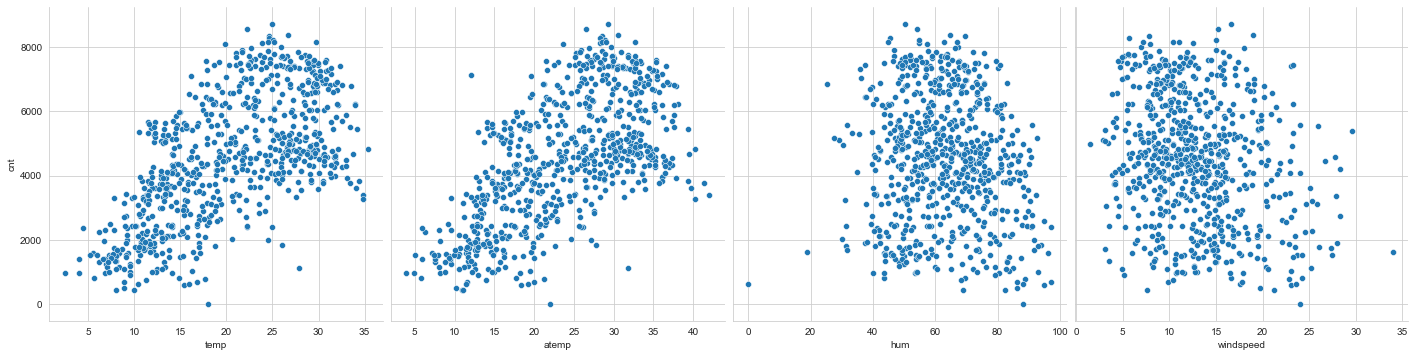

In [74]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

* The number of rentals per day seem to be increasing with temperature and adjusted temperature
* adjusted temperature and temperature have similar trends
* temp vs cnt has two outliers between 15 and 30
* atemp vs cnt has two outliers between 20 and 35
* hum vs cnt has two outliers below 20
* windspeed vs cnt has one outlier above 30

###### Dropping outliers

In [75]:
## Dropping outliers in continuous variables
# outliers in temp
data = data.drop(index = data[(data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000)].index)


# outliers in atemp
data = data.drop(index = data[(data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000)].index)


#outliers in hum
data = data.drop(index = data[(data['hum'] < 20)].index)

#outliers in windspeed
data = data.drop(index = data[(data['windspeed'] > 30)].index)

In [76]:
# Looking at correlation with continuous variables 
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


* adjusted temperature has the highest positive correlation with cnt followed by temperature.
* hum has the lowest correlation.

In [77]:
# correlation between ```temp``` and ```atemp```
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


* Since, the correlation between temp and atemp is almost 1, one of them could be dropped.
* atemp represents adjusted temperature which is an indicator of how hot it actually feels like which is a compound measure of temperature,humidity and windspeed. Ref : UK Meteorological Dept
* atemp might cause bias in data because it's a compound variable, Instead we could use temp , hum , windspeed. Hence , dropping atemp. Also it makes business sense to keep temp and calcuate adjusted temperature from it.

In [78]:
# dropping ```atemp```
data = data.drop(columns=['atemp'])

In [79]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


* There's no signifcant correlation between atemp and hum , windspeed.
* Hence these are not dropped for now.

## Visualizing Categorical Variables

In [81]:
# Converting variables into categorical type 
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [83]:
# Unique values in each categorical variable / [To check for disguised missing values]
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())# Unique values in each categorical variable / [To check for disguised missing values]


Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


* No disguised missing values exist

In [84]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


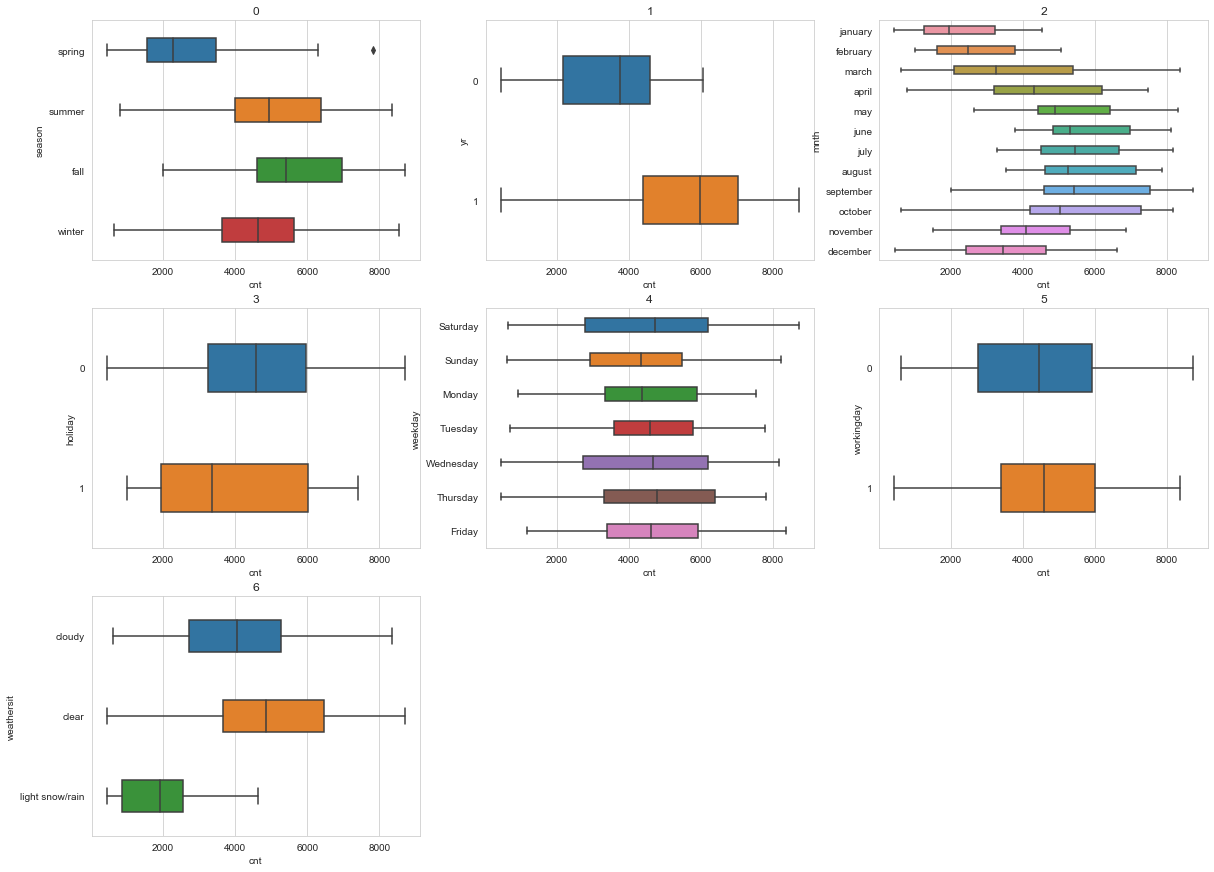

In [85]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

* From the season vs rentals per day plot , fall has the highest average rentals followed by summer.
* Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.
* From the month wise plot, September has the highest rentals, followed by the two months surrounding it. It seems like the trend is explained by seasonal rentals too
* Holidays show lower rental count compared to working days, with greater variability in demand on holidays.
* There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.

##### Outliers in Categorical Variables vs cnt

In [86]:
# Dropping outliers in Categorical Variables 
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)

##### Correlation

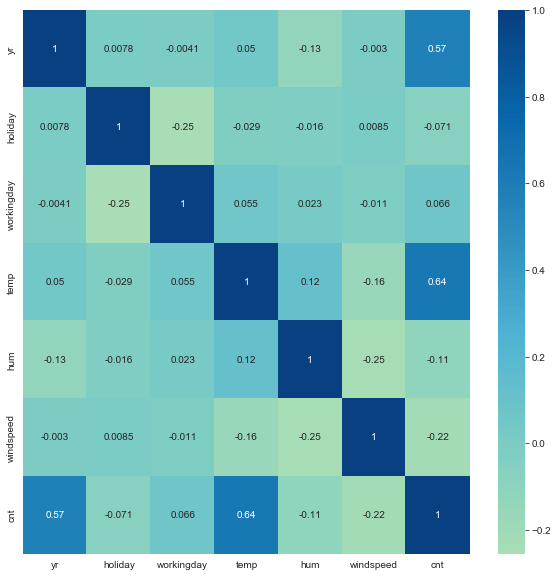

In [87]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap='GnBu',center=0,annot=True)

* Highest correlation with cnt is seen in temp followed by yr

### Data Preparation


#### Creating Indictor Variables

In [88]:
# creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [89]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [90]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'cloudy', 'light snow/rain'],
      dtype='object')

### Splitting the data set into Test & Train subsets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

### Scaling Numerical Features

In [94]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

### X_train , y_train

In [95]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [96]:
y_train.head()


231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [98]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,0,0.795440,0.584687,0.155696,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
107,0,0,1,0.564921,0.401392,0.303720,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
595,1,0,0,0.718600,0.636891,0.110569,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [99]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

### Modelling
Approach

* A mixed approach is followed.
* 15 Best columns are chosen using RFE
* And then p-value method is followed for further elimination.

Recursive Feature Elimination

In [100]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [101]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
21,1,True,Saturday
19,1,True,september
18,1,True,october
16,1,True,may
15,1,True,march
26,1,True,cloudy
13,1,True,july
27,1,True,light snow/rain
1,1,True,holiday


In [102]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Saturday', 'september', 'october', 'may', 'march', 'cloudy',
       'july', 'light snow/rain', 'holiday', 'workingday', 'temp', 'hum',
       'spring', 'windspeed'], dtype=object)

### Manual Elimination


In [111]:
# Following a stepwise elimination
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

#### Model 1
Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [104]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          6.36e-195
Time:                        15:40:44   Log-Likelihood:                -4052.5
No. Observations:                 506   AIC:                             8137.
Df Residuals:                     490   BIC:                             8205.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2655.4490    212.780     

#### Model 2 :
Dropping holiday because of high p-value

In [105]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:41:45   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

#### Model 3 :
Dropping Sunday because of high p-value

In [106]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:42:38   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

#### Model 4
Dropping january because this information might also be contained in winter.

In [107]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:48:13   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

#### Model 5
Dropping december because this information might also be contained in winter.

In [108]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:48:43   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

#### Model 6
Dropping november because this information might also be contained in winter.We see the R2 is dropped significantly, so we can go back to the old model.

In [109]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:49:31   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

#### Verifying MultiCollinearity

In [112]:
vif(X_train[selected_features])

              index        vif
0             const  40.563867
11             temp   2.318964
12              hum   2.245508
13           spring   1.973743
7            cloudy   1.758496
10       workingday   1.632636
2          Saturday   1.619989
8              july   1.417146
9   light snow/rain   1.410386
3         september   1.211662
14        windspeed   1.201419
5               may   1.156218
4           october   1.146561
6             march   1.117208
1                yr   1.046792


### Final Model

In [114]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.06e-195
Time:                        15:54:48   Log-Likelihood:                -4054.1
No. Observations:                 506   AIC:                             8138.
Df Residuals:                     491   BIC:                             8202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2588.4443    209.849     

* 10 features have been selected.
* All the features are statistically significant [low p-value]
* The model over is a good fit with Prob (F-statistic): 4.89e-187
* The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

### Residual Analysis

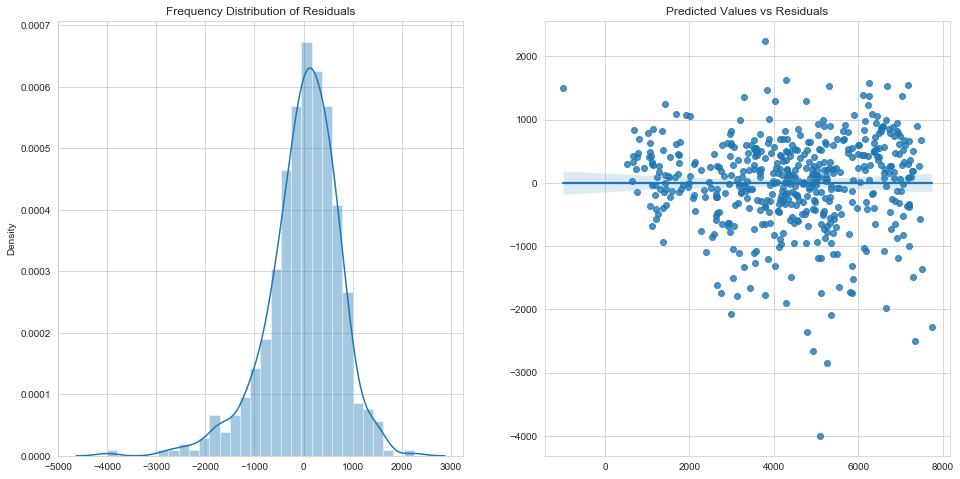

In [115]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [116]:
# Mean of Residuals
(y_train-y_train_pred).mean()

5.054346050168921e-12

* Residual errors follow a normal distribution with mean=0
* Variance of Errors doesnt follow any trends
* Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

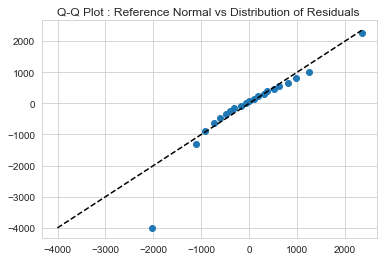

In [117]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

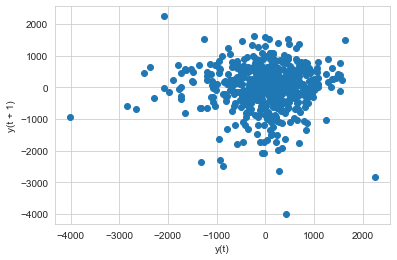

In [118]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

Lagplot of residuals shows no trend. Hence the error terms have constant variance.
Hence, assumptions of Linear Regression are satisfied by this model

### Prediction

In [119]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [120]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

### Model Evaluation

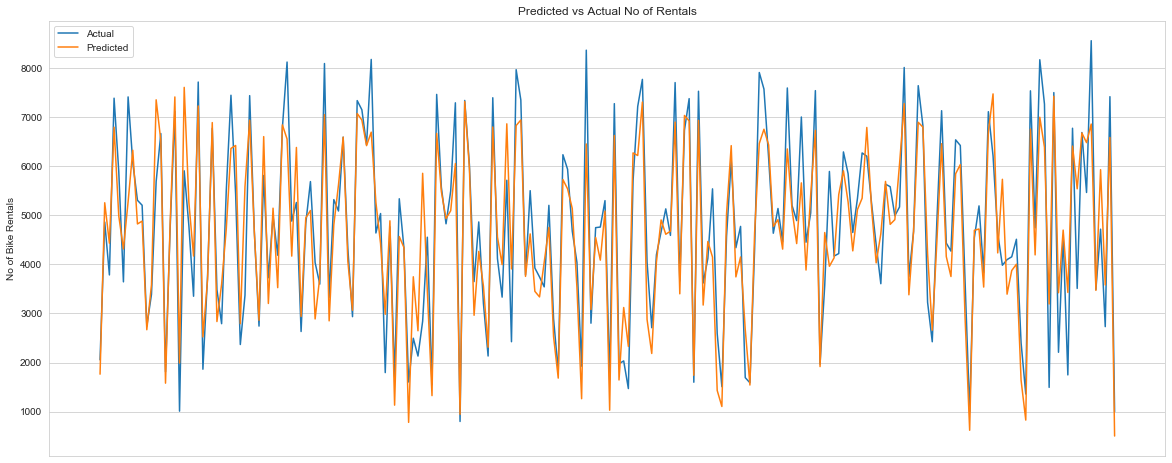

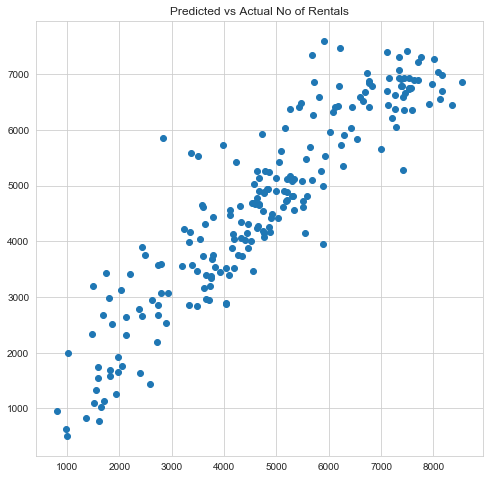

In [121]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

Predicted vs observed value plots shows that the model is reasonably accurate.

In [122]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.83
Mean Squared Error 615561.293


### Model Stability

In [123]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.81948947, 0.89953036, 0.7765874 , 0.91238341, 0.85603092,
       0.87654307, 0.85574267, 0.73424895, 0.7241126 , 0.87865684])

In [124]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.13)


In [125]:
selected_features

array(['yr', 'Saturday', 'september', 'october', 'may', 'march', 'cloudy',
       'july', 'light snow/rain', 'workingday', 'temp', 'hum', 'spring',
       'windspeed'], dtype=object)

### Top Features

In [126]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2588.44429054]


,MLR Coefficients
temp,3620.914150
yr,1987.730388
october,806.410614
september,583.274490
Saturday,473.832992
march,414.572330
workingday,379.071387
may,350.942268
cloudy,-441.101280
july,-622.935240


* Upon standardized the values of predictor variables, the above shows that the top features influencing demand are temp, followed by yr and hum
* In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by xxx, when all other modelled paramters are held unchanged.
* In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is xxx,, when all other modelled paramters are held unchanged.

### Conclusion
Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 10 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.
The final relationship between demand and predictors is as follows.

* cnt = 2392.0791 + 1946.7864 yr + 444.4907 Saturday + 466.0136 winter - 890.3115 july -1063.6669 spring + 296.8008 workingday - 1749.8275 hum + 4471.6602 temp - 1110.3191 windspeed - 1273.7519 light snow/rain
where temp , windspeed and hum are normalized.

#### Note :

* Data has been cleaned to drop outliers that might affect the model adversely
* The model has been verified for Multicollinearity effects.
* Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
* Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
* Further Lag plot shows there is no auto-correlation in data.
* Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
* Features in the order of influence has been reported by standardizing all predictor values.